In [1005]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

Build an SVM model based on the vectors of the two classes given in the file
svm-data.csv. Predict the class for the vectors below:
A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5]

[1.0, 0.0, 1.5] red
[-1, 2, -2] black
[0.0, 0.2, 0.7] green
[1.0, -2.0, 2.5] gray


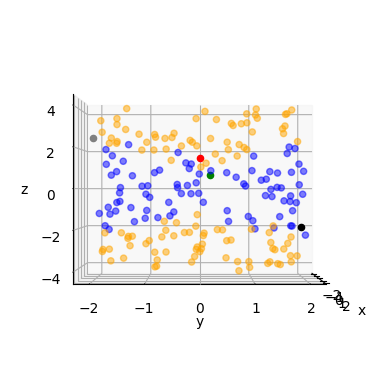

In [1006]:
data = np.loadtxt("1675165648550_svm_data_200.csv", quotechar='"', delimiter=',', dtype=str)

parsed_data = [[float(x),float(y),float(z),int(c)] for x,y,z,c in data[1:]]
classes_n = list(set([item[3] for item in parsed_data]))
classes = { c: [] for c in classes_n }

X = []
Y = []
for x,y,z,c in parsed_data:
    v = [x,y,z]
    X.append(v)
    Y.append(c)
    classes[c].append(v)

X = np.array(X)
Y = np.array(Y)

P = [
    np.array([1, 0, 1.5]),
    np.array([-1, 2, -2]),
    np.array([0, 0.2, 0.7]),
    np.array([1, -2, 2.5])
]

fig = plt.figure()
sb = fig.add_subplot(111, projection='3d')
colors = ['orange', 'blue']
for c in classes:
    x,y,z = zip(*classes[c])
    sb.scatter(x, y, z, c=colors[c], alpha=0.5)

cc = ['red', 'black', 'green', 'gray']
for i in range(len(P)):
    x,y,z = P[i]
    print([x,y,z], cc[i])
    sb.scatter(x, y, z, alpha=1, c=cc[i])

sb.set_xlabel('x')
sb.set_ylabel('y')
sb.set_zlabel('z')

sb.view_init(0, 0)
plt.show()



In [1007]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(f"score: {model.score(X,Y)}")
print(f"accuracy_score: {acc}")
print(f"predictions: {predictions}")

r_predictions = model.predict(P)
print(f"result predictions: {r_predictions}")
print('')

pars = model.get_params()
for par, val in pars.items():
    s = " "*(20 - len(par))
    print(f"{par}: {s} {val}")

score: 0.985
accuracy_score: 1.0
predictions: [1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1]
result predictions: [0 1 1 0]

C:                     10
break_ties:            False
cache_size:            200
class_weight:          None
coef0:                 0.0
decision_function_shape:  ovr
degree:                3
gamma:                 scale
kernel:                rbf
max_iter:              -1
probability:           False
random_state:          None
shrinking:             True
tol:                   0.001
verbose:               False
